In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Датасет

In [218]:
data = pd.read_csv('data/default.csv')
data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [219]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Плохо считали колонки. Переделеаем

In [220]:
data = pd.read_csv('data/default.csv', header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [221]:
data = data.drop(columns=['ID'])
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Выделим категориальные и числовые признаки

In [222]:
data['default'] = data['default payment next month']
data.drop(columns=['default payment next month'], inplace=True)

In [223]:
target_column = 'default'

categorical_columns = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
]

numerical_columns = [col for col in data.columns if (col not in categorical_columns) and (col != target_column)]

### Удалим пропуски и дубликаты

In [224]:
data.dropna(inplace=True)
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [225]:
data.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Распределение целевой переменной

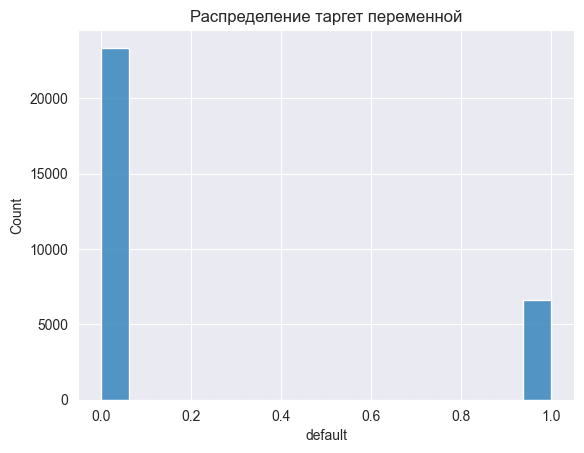

In [226]:
sns.histplot(data['default'])
plt.title(f"Распределение таргет переменной")
plt.show()

### В данных содержатся некорректные значения (не int) — удалим их (например есть значение 118d76)

In [227]:
data.dtypes

LIMIT_BAL     int64
SEX           int64
EDUCATION     int64
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1    object
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [228]:
def is_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False


for column in data.columns:
    # оставляем только то, что можно конвертировать в int
    data = data[data[column].apply(is_int)]
data.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [229]:
data = data.astype(int)
data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

### Эти признаки означают количество (по описанию датасета), так что не могут быть <0. Почистим данные

In [230]:
grater_zero_columns = [
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]
print(f'Размер датасета ДО обработки = {data.shape[0]}')
for col in grater_zero_columns[1:2]:
    data = data[data[col] >= 0]
print(f'Размер датасета ПОСЛЕ обработки = {data.shape[0]}')

Размер датасета ДО обработки = 29999
Размер датасета ПОСЛЕ обработки = 29330


### Матрица корреляций

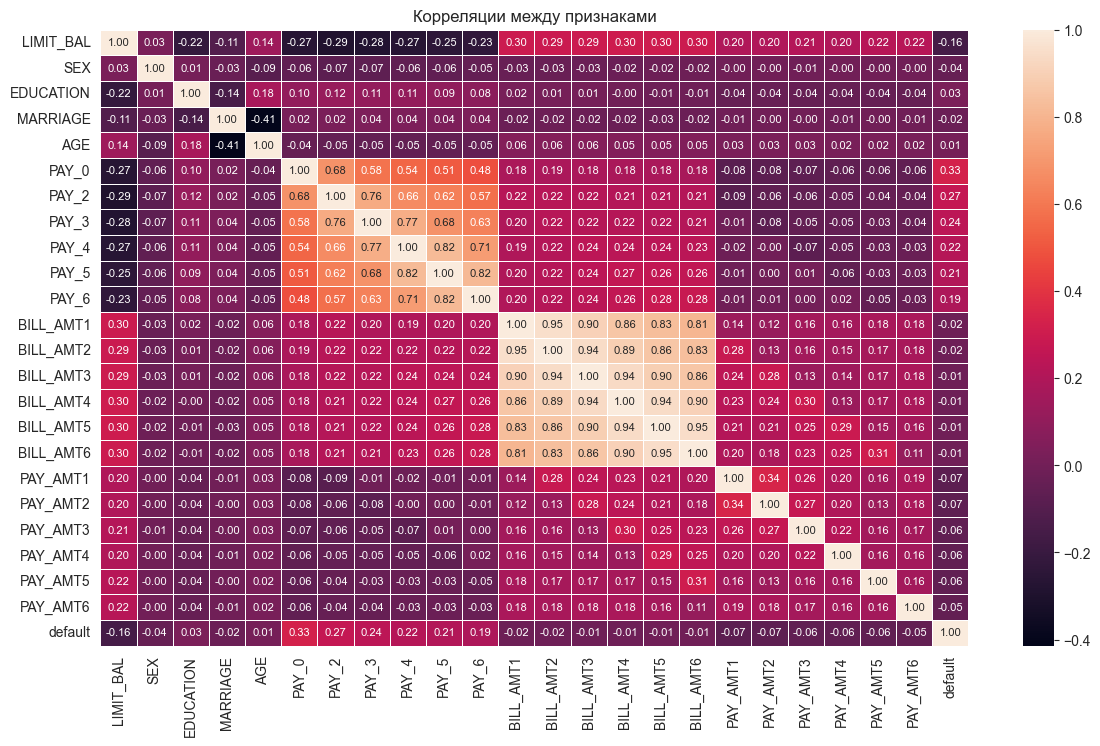

In [231]:
# корреляция
correlation_matrix = data.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8},
)
plt.title("Корреляции между признаками")
plt.show()

### Посмотрим на выборсы

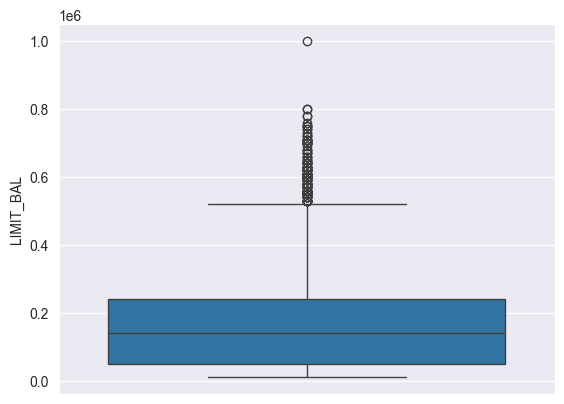

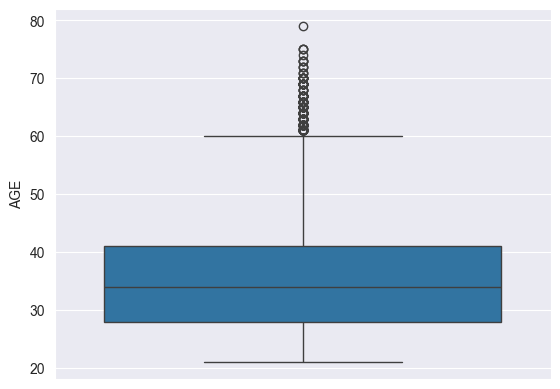

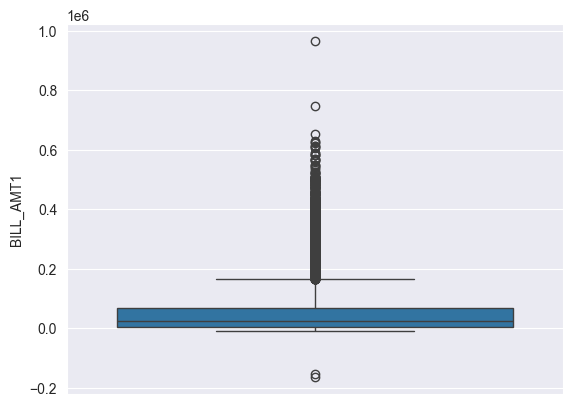

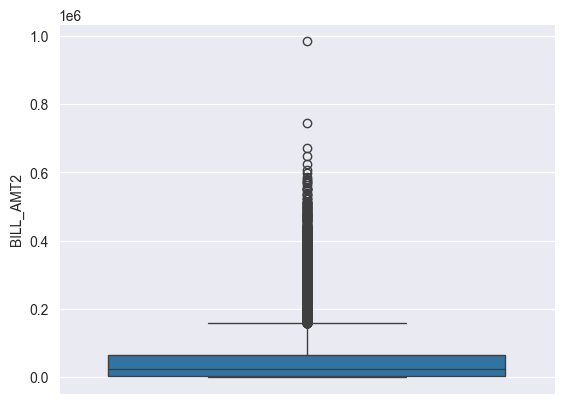

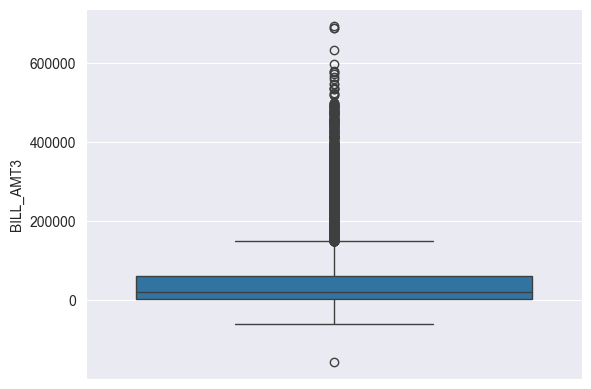

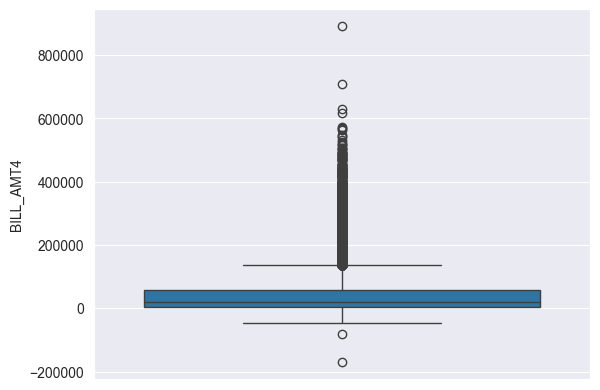

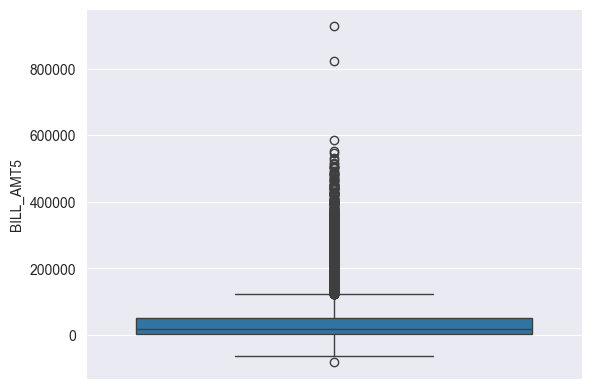

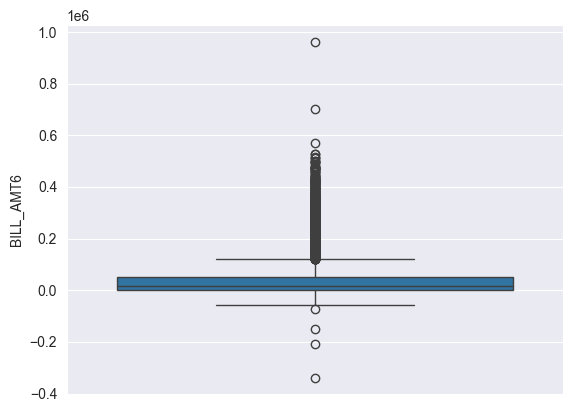

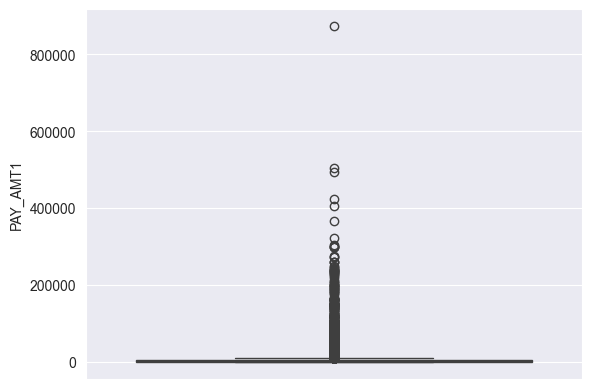

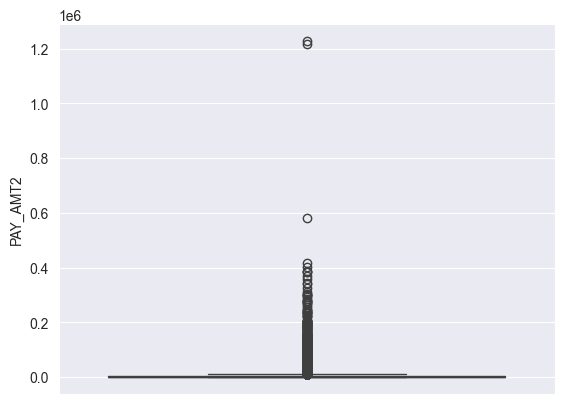

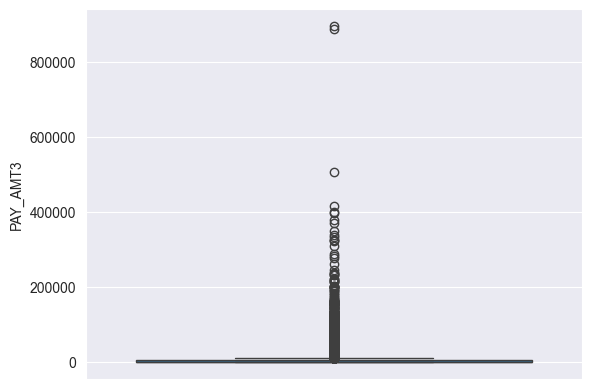

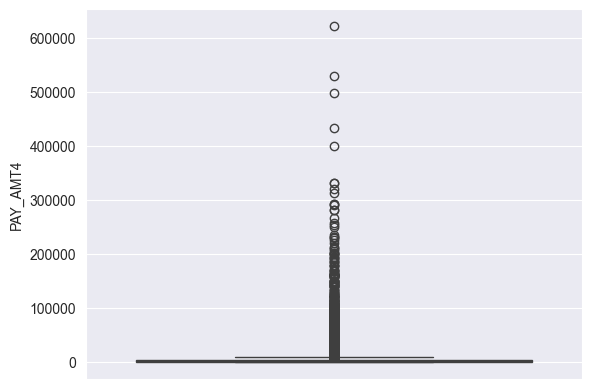

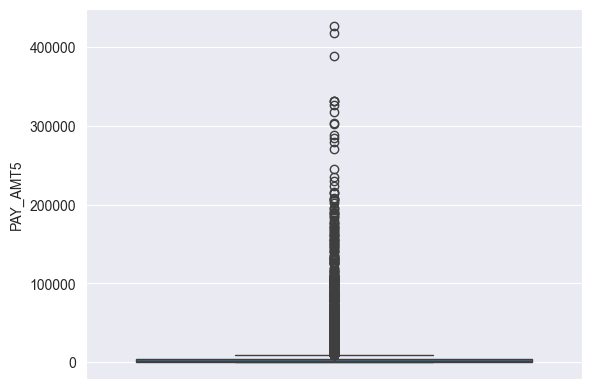

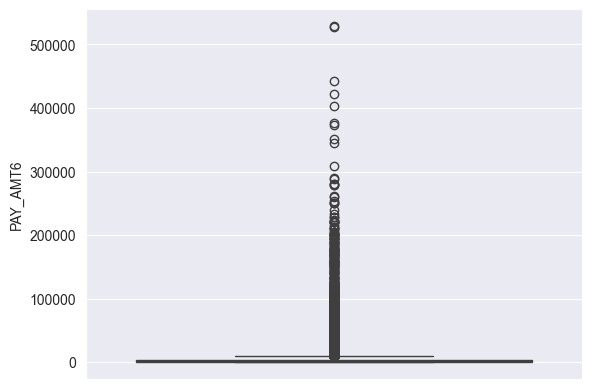

In [232]:
for column in numerical_columns:
    sns.boxplot(data[column])
    plt.show()

### Базовые статистики

In [233]:
#  базовые статистики
basic_stats = data.describe()
basic_stats.T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29330.0,166362.757586,129636.642195,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,29330.0,1.603853,0.489104,1.0,1.00,2.0,2.00,2.0
EDUCATION,29330.0,1.857688,0.790469,0.0,1.00,2.0,2.00,6.0
MARRIAGE,29330.0,1.551381,0.521915,0.0,1.00,2.0,2.00,3.0
AGE,29330.0,35.468360,9.226354,21.0,28.00,34.0,41.00,79.0
PAY_0,29330.0,-0.004569,1.117029,-2.0,-1.00,0.0,0.00,8.0
PAY_2,29330.0,-0.103512,1.186800,-2.0,-1.00,0.0,0.00,8.0
PAY_3,29330.0,-0.132185,1.186668,-2.0,-1.00,0.0,0.00,8.0
PAY_4,29330.0,-0.195568,1.162424,-2.0,-1.00,0.0,0.00,8.0
PAY_5,29330.0,-0.244630,1.128212,-2.0,-1.00,0.0,0.00,8.0


### Распределение признаков

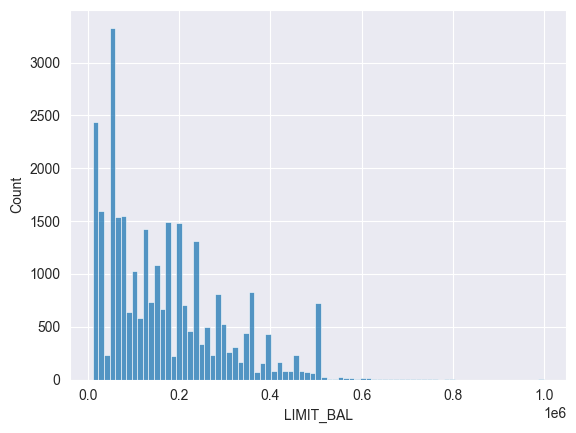

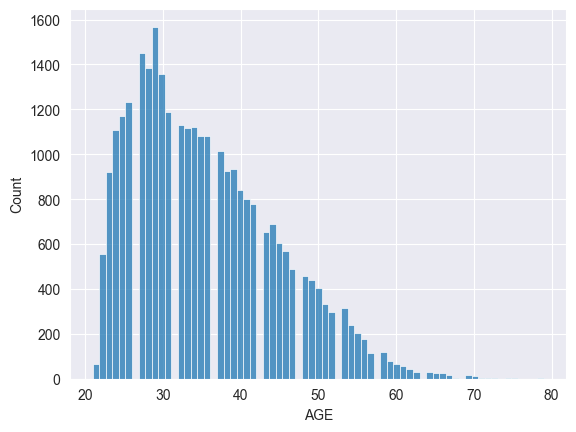

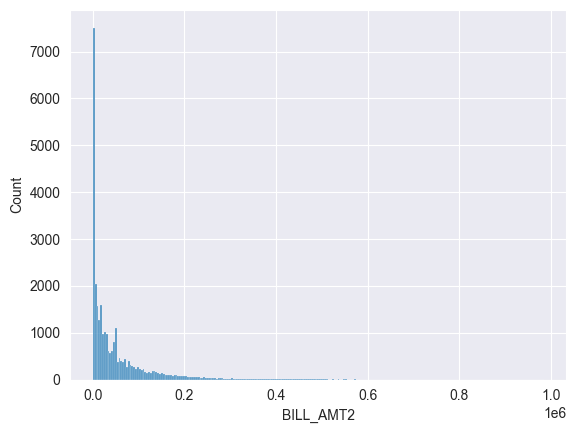

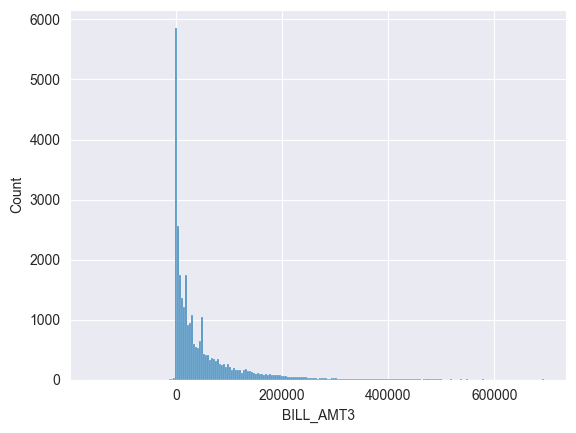

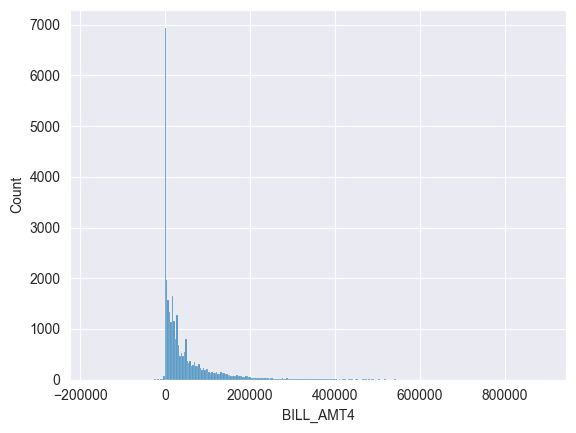

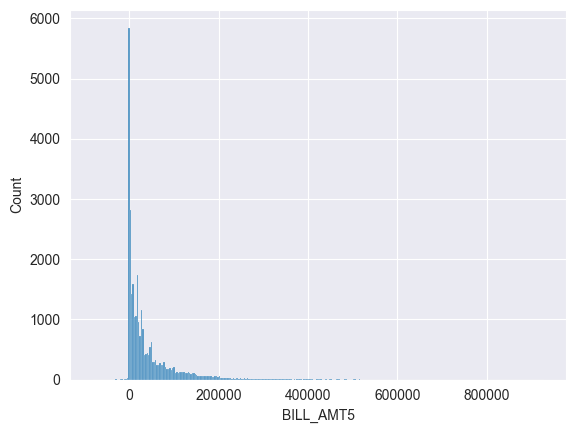

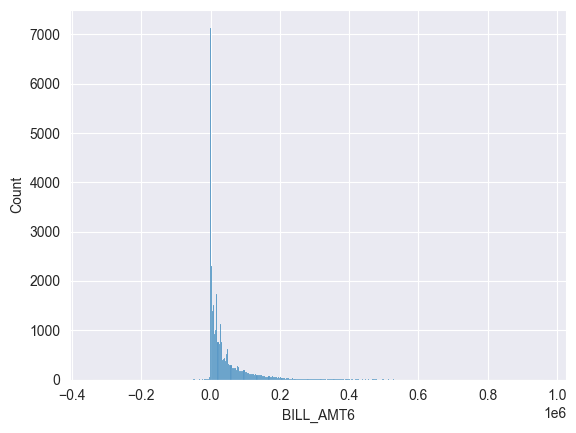

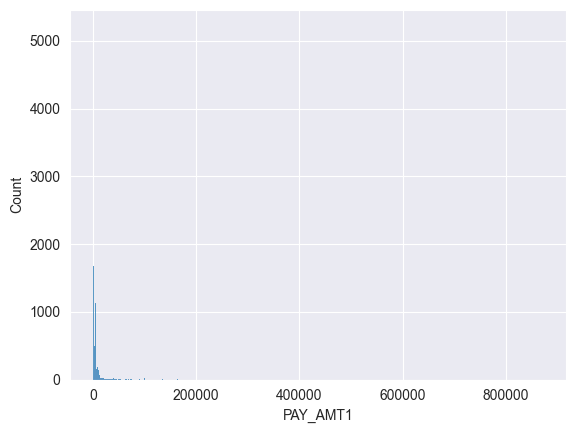

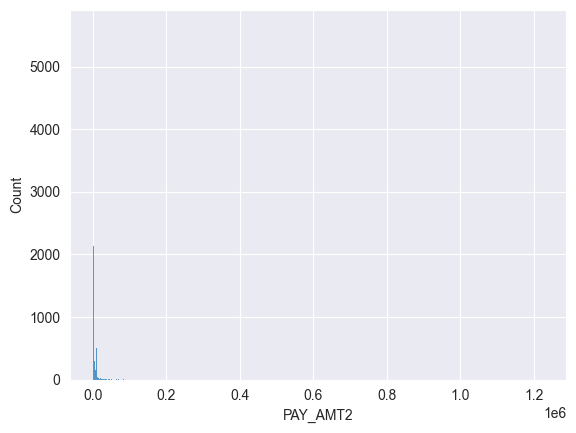

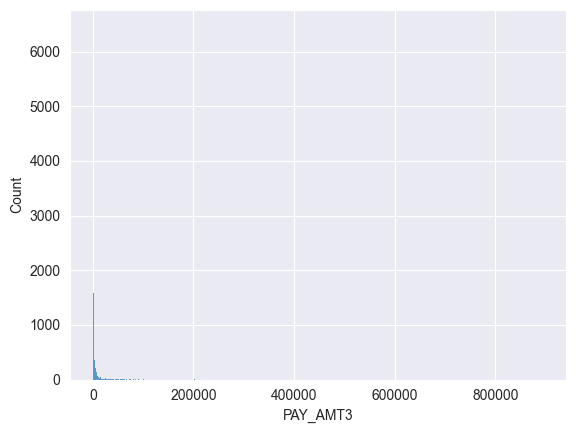

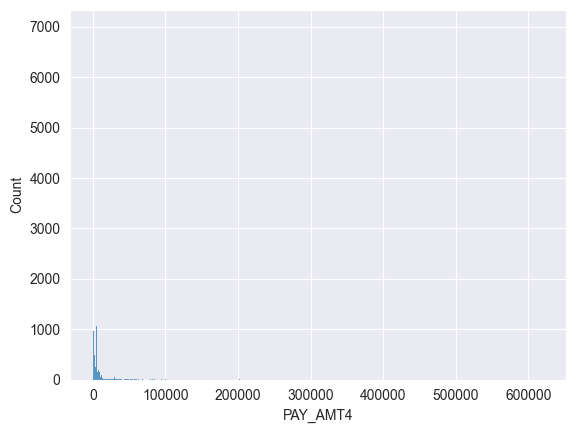

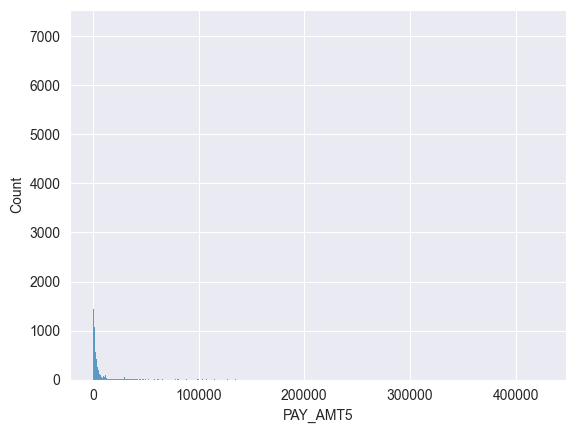

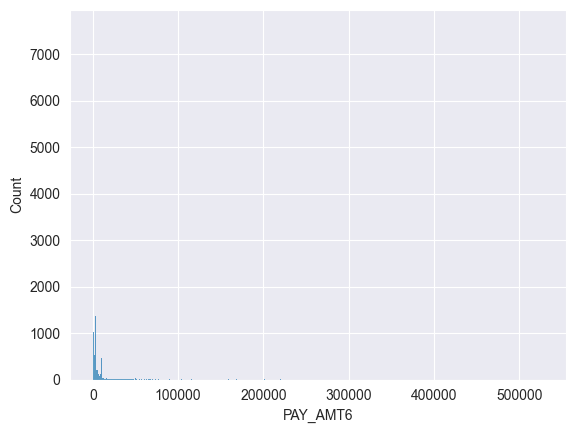

In [234]:
for column in numerical_columns:
    if column != 'BILL_AMT1':
        sns.histplot(data[column])
        plt.show()

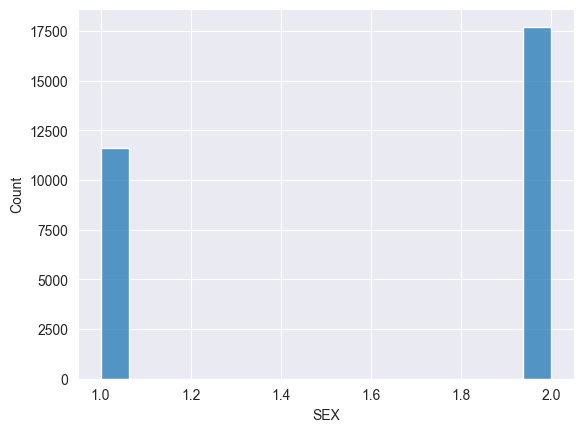

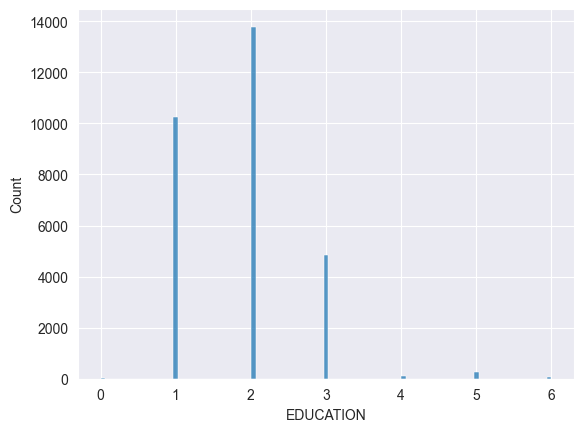

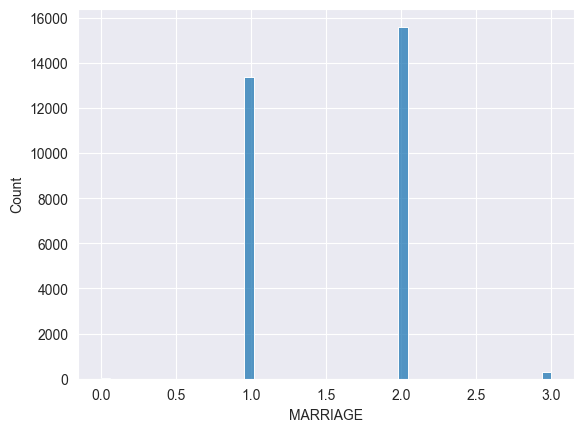

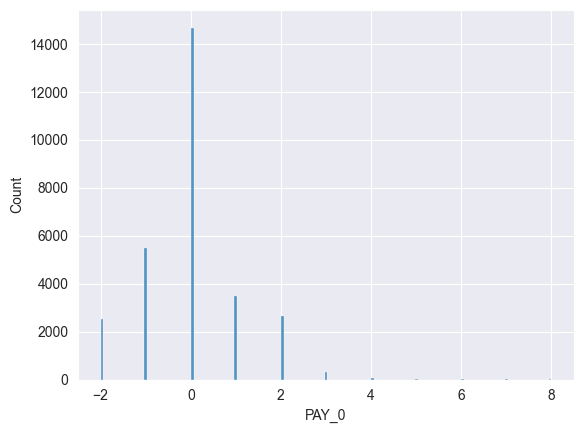

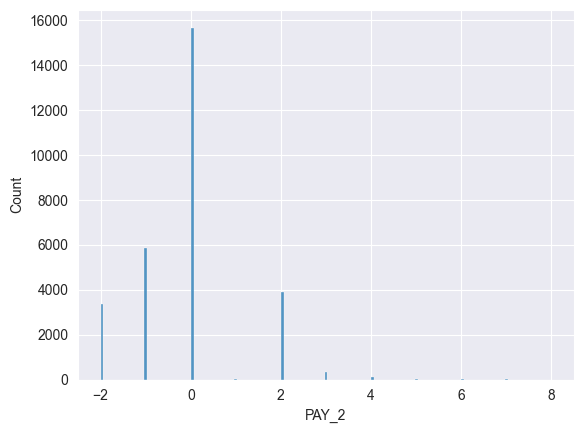

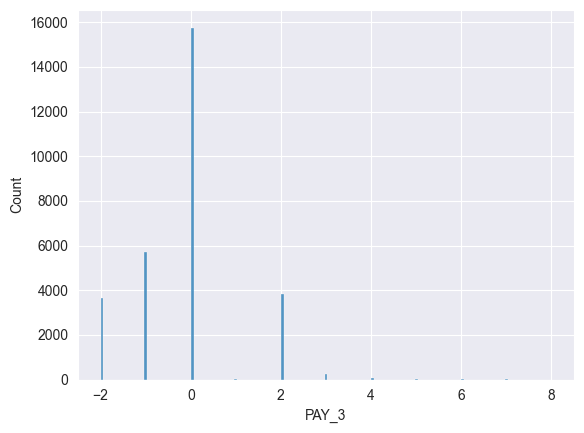

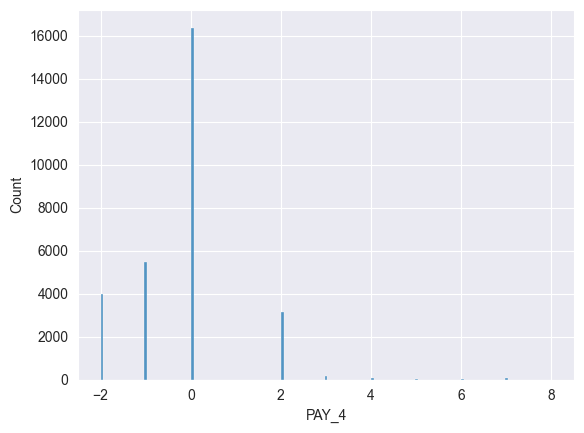

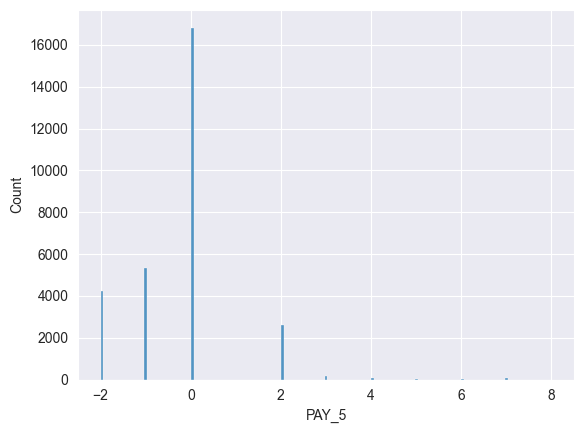

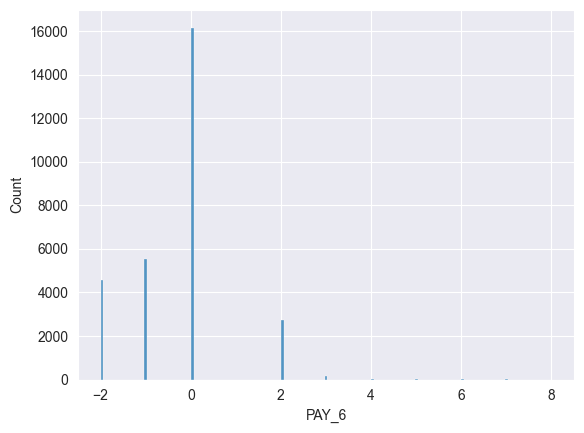

In [235]:
for column in categorical_columns:
    sns.histplot(data[column])
    plt.show()

# Обучение

In [236]:
X = data.drop(columns=['default'])
y = data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# классификаторы
logistic_regression_cls = LogisticRegression(random_state=42)
decision_tree_cls = DecisionTreeClassifier(random_state=42)
boost_cls = GradientBoostingClassifier(random_state=42)

# обучение модели
logistic_regression_cls.fit(X_train, y_train)
decision_tree_cls.fit(X_train, y_train)
boost_cls.fit(X_train, y_train)

None

/Users/mdmkudryashov/PycharmProjects/hse-ml-hw-1/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [238]:
# предсказание результатов
y_pred_log = logistic_regression_cls.predict(X_test)
y_pred_tree = decision_tree_cls.predict(X_test)
y_pred_boost = decision_tree_cls.predict(X_test)

y_pred_proba_log = logistic_regression_cls.predict_proba(X_test)[:, 1]
y_pred_proba_tree = decision_tree_cls.predict_proba(X_test)[:, 1]
y_pred_proba_boost = decision_tree_cls.predict_proba(X_test)[:, 1]

In [239]:
from sklearn.metrics import classification_report

# precision, recall, f1
print("Метрики для логистической регрессия:")
print(classification_report(y_test, y_pred_log))

Метрики для логистической регрессия:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4526
           1       0.00      0.00      0.00      1340

    accuracy                           0.77      5866
   macro avg       0.39      0.50      0.44      5866
weighted avg       0.60      0.77      0.67      5866



In [240]:
# precision, recall, f1
print("Метрики для дерева решений:")
print(classification_report(y_test, y_pred_tree))

Метрики для дерева решений:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4526
           1       0.39      0.42      0.40      1340

    accuracy                           0.72      5866
   macro avg       0.61      0.61      0.61      5866
weighted avg       0.72      0.72      0.72      5866



In [241]:
from sklearn.metrics import classification_report

# precision, recall, f1
print("Метрики для градиентного бустинга:")
print(classification_report(y_test, y_pred_boost))

Метрики для градиентного бустинга:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4526
           1       0.39      0.42      0.40      1340

    accuracy                           0.72      5866
   macro avg       0.61      0.61      0.61      5866
weighted avg       0.72      0.72      0.72      5866



In [242]:
def show_confusion_matrix(y_pred, title: str):
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title(title)
    plt.show()

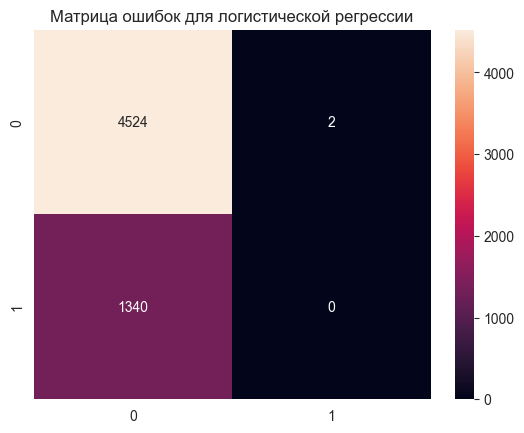

In [243]:
show_confusion_matrix(y_pred_log, "Матрица ошибок для логистической регрессии")

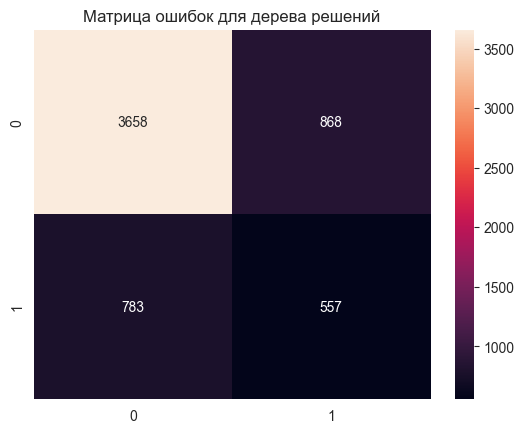

In [244]:
show_confusion_matrix(y_pred_tree, "Матрица ошибок для дерева решений")

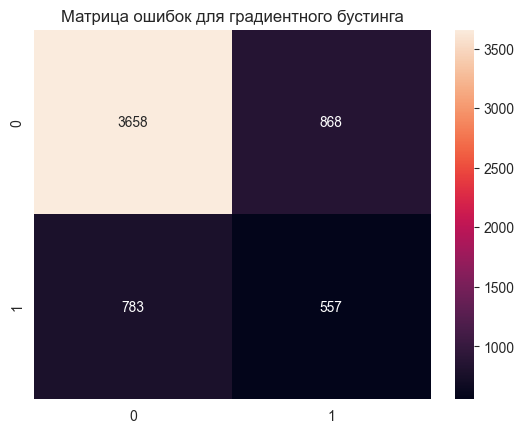

In [245]:
show_confusion_matrix(y_pred_boost, "Матрица ошибок для градиентного бустинга")

In [246]:
from sklearn.metrics import auc

fpr_log, tpr_log, _ = roc_curve(y_test, logistic_regression_cls.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_cls.predict_proba(X_test)[:, 1])
fpr_boost, tpr_boost, _ = roc_curve(y_test, boost_cls.predict_proba(X_test)[:, 1])

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_tree = auc(fpr_tree, tpr_tree)
roc_auc_boost = auc(fpr_boost, tpr_boost)

print(f"Логистическая регрессия: ROC AUC = {roc_auc_log:.4f}")
print(f"Дерево решений: ROC AUC = {roc_auc_tree:.4f}")
print(f"Градиентный бустинг: ROC AUC = {roc_auc_boost:.4f}")

Логистическая регрессия: ROC AUC = 0.6541
Дерево решений: ROC AUC = 0.6132
Градиентный бустинг: ROC AUC = 0.7802


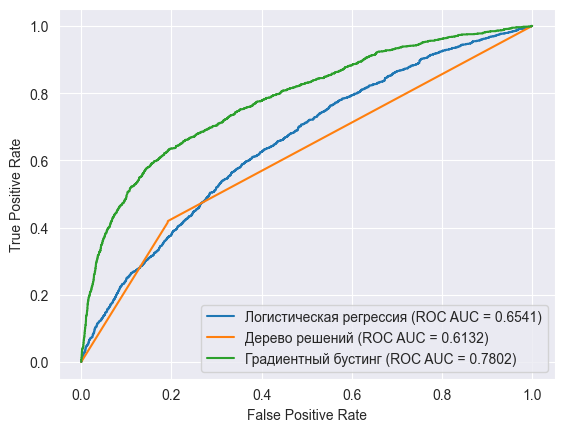

In [247]:

plt.plot(fpr_log, tpr_log, label=f"Логистическая регрессия (ROC AUC = {auc(fpr_log, tpr_log):.4f})")
plt.plot(fpr_tree, tpr_tree, label=f"Дерево решений (ROC AUC = {auc(fpr_tree, tpr_tree):.4f})")
plt.plot(fpr_boost, tpr_boost, label=f"Градиентный бустинг (ROC AUC = {auc(fpr_boost, tpr_boost):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Попробуем масштабировать признаки

In [248]:
from sklearn.preprocessing import StandardScaler

X_train[numerical_columns] = StandardScaler().fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = StandardScaler().fit_transform(X_test[numerical_columns])

   Ответьте на следующие вопросы в рамках итогового отчета:
   - Какие преобразования данных оказались наиболее важными для качества модели? Почему?
   - Какая модель показала лучшие результаты? Почему, на ваш взгляд?
   - Приведите примеры, как данная модель может быть применена на практике в конкретной бизнес-задаче.

In [249]:
# классификаторы
logistic_regression_cls = LogisticRegression(random_state=42)
decision_tree_cls = DecisionTreeClassifier(random_state=42)
boost_cls = GradientBoostingClassifier(random_state=42)

# обучение модели
logistic_regression_cls.fit(X_train, y_train)
decision_tree_cls.fit(X_train, y_train)
boost_cls.fit(X_train, y_train)

# предсказание результатов
y_pred_log = logistic_regression_cls.predict(X_test)
y_pred_tree = decision_tree_cls.predict(X_test)
y_pred_boost = decision_tree_cls.predict(X_test)

y_pred_proba_log = logistic_regression_cls.predict_proba(X_test)[:, 1]
y_pred_proba_tree = decision_tree_cls.predict_proba(X_test)[:, 1]
y_pred_proba_boost = decision_tree_cls.predict_proba(X_test)[:, 1]

In [251]:
from sklearn.metrics import classification_report

# precision, recall, f1
print("Метрики для градиентного бустинга:")
print(classification_report(y_test, y_pred_boost))

Метрики для градиентного бустинга:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4526
           1       0.37      0.34      0.36      1340

    accuracy                           0.72      5866
   macro avg       0.59      0.58      0.59      5866
weighted avg       0.71      0.72      0.71      5866



Логистическая регрессия: ROC AUC = 0.7159
Дерево решений: ROC AUC = 0.5849
Градиентный бустинг: ROC AUC = 0.7723


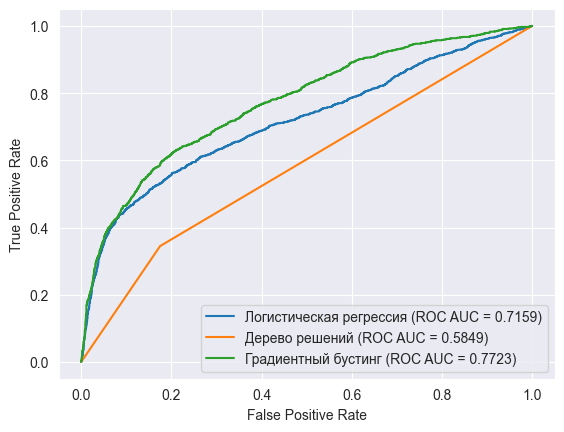

In [250]:
from sklearn.metrics import auc

fpr_log, tpr_log, _ = roc_curve(y_test, logistic_regression_cls.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_cls.predict_proba(X_test)[:, 1])
fpr_boost, tpr_boost, _ = roc_curve(y_test, boost_cls.predict_proba(X_test)[:, 1])

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_tree = auc(fpr_tree, tpr_tree)
roc_auc_boost = auc(fpr_boost, tpr_boost)

print(f"Логистическая регрессия: ROC AUC = {roc_auc_log:.4f}")
print(f"Дерево решений: ROC AUC = {roc_auc_tree:.4f}")
print(f"Градиентный бустинг: ROC AUC = {roc_auc_boost:.4f}")

plt.plot(fpr_log, tpr_log, label=f"Логистическая регрессия (ROC AUC = {auc(fpr_log, tpr_log):.4f})")
plt.plot(fpr_tree, tpr_tree, label=f"Дерево решений (ROC AUC = {auc(fpr_tree, tpr_tree):.4f})")
plt.plot(fpr_boost, tpr_boost, label=f"Градиентный бустинг (ROC AUC = {auc(fpr_boost, tpr_boost):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Выводы

Все 3 модели показали достаточно низкие результаты. Лучше всех себя показал градиентный бустинг с ROC-AUC 0.77.

Масштабирование признаков не дало особого прироста — увеличился ROC-AUC для лог. регресси и уменьшился для дерева решений. Показатель градиентного бустинга почти не изменился

В датасете были немного кривые данные — признаки, которые означают количество были иногда отрицательными.

Как бы я не пытался улучшить итоговые показатели — 0.77 у градиентного бустинга — лучший результат.